<a href="https://colab.research.google.com/github/maryvorob/colab/blob/master/sobaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [7, 3]


def diff_month(d1, d2):
    # https://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
    return (d1.year - d2.year) * 12 + d1.month - d2.month


def background_gradient(s, m=0, M=0.4, cmap='Wistia', low=0, high=1):
    # https://stackoverflow.com/questions/38931566/pandas-style-background-gradient-both-rows-and-columns
    rng = M - m
    normed = colors.Normalize(m - (rng * low), M + (rng * high))(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [2]:
url = 'https://github.com/maryvorob/colab/blob/master/sobaka.xlsx?raw=true'
data = pd.read_excel(url, usecols=[0, 1, 2])
data.columns = ['ts', 'client_id', 'price']
data['ts'] = pd.to_datetime(data['ts'])
data['month'] = data['ts'].astype('<M8[M]')
data['day'] = data['ts'].astype('<M8[D]')
data.head()

,ts,client_id,price,month,day
0,2018-01-31 22:30:00,1,500,2018-01-01,2018-01-31
1,2018-01-31 22:00:00,2,500,2018-01-01,2018-01-31
2,2018-01-31 21:00:00,3,500,2018-01-01,2018-01-31
3,2018-01-31 21:00:00,4,500,2018-01-01,2018-01-31
4,2018-01-31 20:30:00,5,500,2018-01-01,2018-01-31


,ts,day,month
client_id,,,
1,2017-12-15 22:30:00,2017-12-15,2017-12-01
2,2017-12-12 12:00:00,2017-12-12,2017-12-01
3,2016-11-27 11:00:00,2016-11-27,2016-11-01
4,2017-12-24 21:00:00,2017-12-24,2017-12-01
5,2018-01-24 20:30:00,2018-01-24,2018-01-01


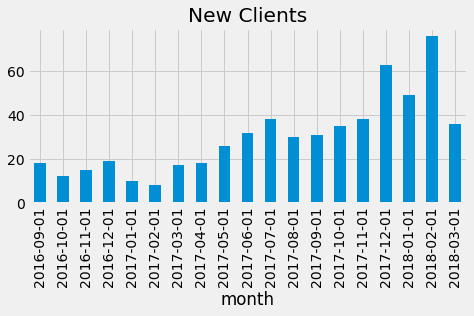

In [3]:
clients = data.groupby('client_id')[['ts', 'day', 'month']].min()
clients.groupby(clients['month'].astype(str)).size().plot(kind='bar', rot=90, title='New Clients')
clients.head()

,month,client_id,orders,rev,birth,age,status
0,2016-09-01,14,12,6000,2016-09-01,0,NEW
1,2016-09-01,26,36,18000,2016-09-01,0,NEW
2,2016-09-01,41,14,7000,2016-09-01,0,NEW
3,2016-09-01,73,11,5500,2016-09-01,0,NEW
4,2016-09-01,228,2,1000,2016-09-01,0,NEW


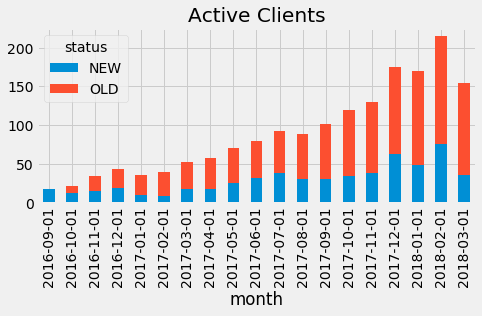

In [4]:
df = data.groupby(['month', 'client_id']).agg(orders=('price', 'count'), rev=('price', 'sum')).reset_index()
df['birth'] = df['client_id'].map(clients['month'])
df['age'] = diff_month(df['month'].dt, df['birth'].dt)
df['status'] = (df['age'] == 0).map({False: 'OLD', True: 'NEW'})
df.groupby([df['month'].astype(str), 'status']).size().unstack('status').plot(kind='bar', rot=90, stacked=True, title='Active Clients');
df.head()

In [43]:
coh = df.pivot_table(index='age', columns=df['birth'].astype(str), values='rev', aggfunc='count')
coh.style.apply(background_gradient, low=0, high=50)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


birth,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01
age,,,,,,,,,,,,,,,,,,,
0,18,12,15,19,10,8,17,18,26,32,38,30,31,35,38,63,49,76,36
1,9,9,7,10,4,6,8,8,6,17,14,14,16,17,21,36,25,26,nan
2,10,6,3,5,1,6,6,5,6,11,12,10,13,17,18,23,13,nan,nan
3,11,5,7,4,1,6,8,5,7,8,7,10,11,10,15,17,nan,nan,nan
4,8,6,9,4,1,5,4,3,7,9,8,9,10,10,10,nan,nan,nan,nan
5,10,5,5,4,2,4,5,4,7,7,8,6,12,5,nan,nan,nan,nan,nan
6,10,6,6,2,1,4,4,5,6,6,7,5,9,nan,nan,nan,nan,nan,nan
7,9,6,6,2,1,5,5,5,7,5,8,5,nan,nan,nan,nan,nan,nan,nan
8,8,4,4,1,1,5,4,3,4,3,8,nan,nan,nan,nan,nan,nan,nan,nan


In [45]:
ret = coh.divide(coh.loc[0])
ret.style.apply(background_gradient).format('{:.1%}')

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


birth,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01
age,,,,,,,,,,,,,,,,,,,
0,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%
1,50.0%,75.0%,46.7%,52.6%,40.0%,75.0%,47.1%,44.4%,23.1%,53.1%,36.8%,46.7%,51.6%,48.6%,55.3%,57.1%,51.0%,34.2%,nan%
2,55.6%,50.0%,20.0%,26.3%,10.0%,75.0%,35.3%,27.8%,23.1%,34.4%,31.6%,33.3%,41.9%,48.6%,47.4%,36.5%,26.5%,nan%,nan%
3,61.1%,41.7%,46.7%,21.1%,10.0%,75.0%,47.1%,27.8%,26.9%,25.0%,18.4%,33.3%,35.5%,28.6%,39.5%,27.0%,nan%,nan%,nan%
4,44.4%,50.0%,60.0%,21.1%,10.0%,62.5%,23.5%,16.7%,26.9%,28.1%,21.1%,30.0%,32.3%,28.6%,26.3%,nan%,nan%,nan%,nan%
5,55.6%,41.7%,33.3%,21.1%,20.0%,50.0%,29.4%,22.2%,26.9%,21.9%,21.1%,20.0%,38.7%,14.3%,nan%,nan%,nan%,nan%,nan%
6,55.6%,50.0%,40.0%,10.5%,10.0%,50.0%,23.5%,27.8%,23.1%,18.8%,18.4%,16.7%,29.0%,nan%,nan%,nan%,nan%,nan%,nan%
7,50.0%,50.0%,40.0%,10.5%,10.0%,62.5%,29.4%,27.8%,26.9%,15.6%,21.1%,16.7%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
8,44.4%,33.3%,26.7%,5.3%,10.0%,62.5%,23.5%,16.7%,15.4%,9.4%,21.1%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


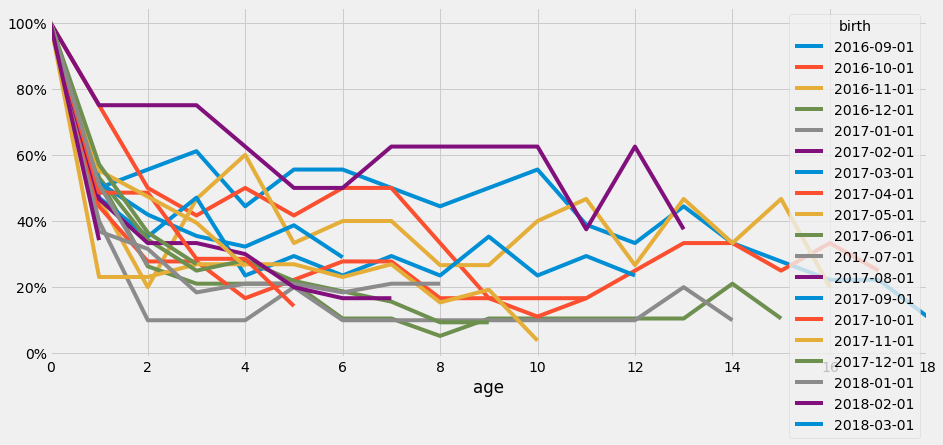

In [51]:
ax = ret.plot(figsize=(14, 6));
# https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()]);